# Predicting heart disease using machine learning 
This notebook looks into various python-based machine learning and data science libraries in an attemot to build a machine learning model capable of predicting whether or not a person has heart disease based on their medical conditions

We are ging to take the following approaches  
1. Problem definition
2. Data
3. Evaluation
4. Features 
5. Modelling 
6. Experimentation

## 1. Problem Definition

In a statement, 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease

## 2. Data

The original data came from the Cleaveland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept , we will pursuethe project.

## 4. Features
This is where you'll get different indormation about each of the features in your data 

**Create data dictionary**

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

Lets Begin.............................................

## a. PRAPARING OUR TOOLS

We're going to use pandas, matplotlib, and numpy for data analysis and manipulation 

In [1]:
# Import tools that we need 

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

%matplotlib inline 
# This keeps the plot in inside the notebook 

# models from scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# models for evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [2]:
import warnings
warnings.filterwarnings("ignore")

## b. LOAD DATA

In [3]:
data = pd.read_csv("heart-disease.csv")
data.shape # the shape gives data in the form of rows and columns
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## c. DATA EXPLORATION (exploratory data analysis or EDA)
The goal is to be more familiar with the data you are working well. Ask the following questions:
    
    1. What question(s) are you trying to solve? 
    2. What kind of data do we have and how do we treat different types?
    3. What's missing from the data and how do you deal with them?
    4. Where are the outliers and why should you care about them?
    5. How can you add, change or removed features to get more out of your data? 

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# let's find out how many of each class there are in the data 
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

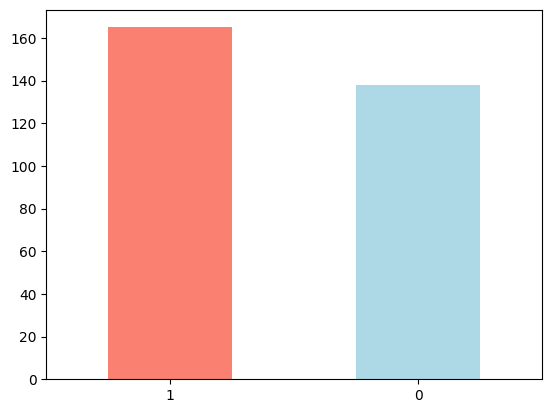

In [7]:
data["target"].value_counts().plot(kind="bar", 
                                   color=["salmon", "lightblue"])
plt.xticks(rotation=0);

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**heart disease frequency according to sex**

In [11]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# compare target column to sex column
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [13]:
# compare target column to cp column
pd.crosstab(data.target, data.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


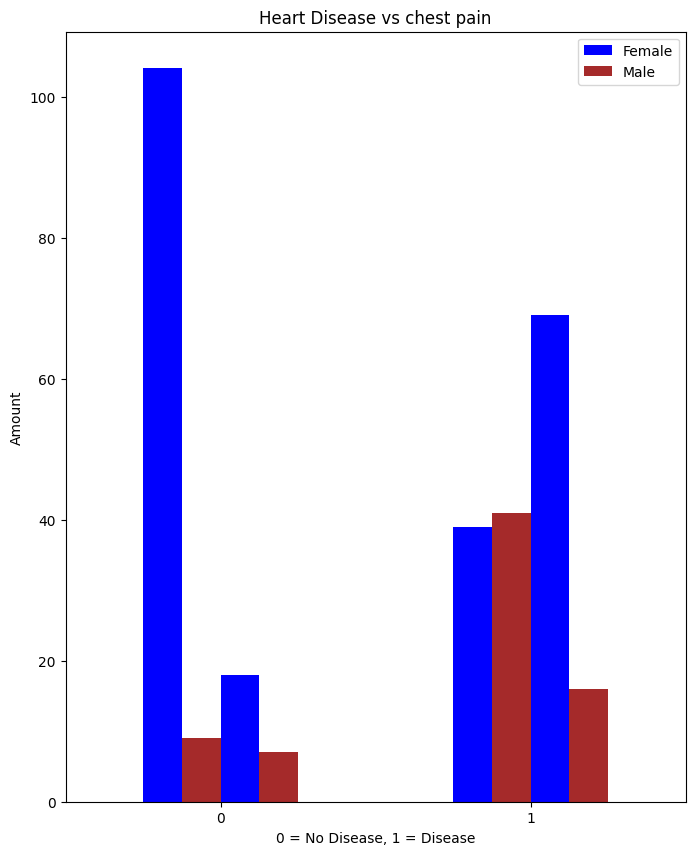

In [14]:
pd.crosstab(data.target, data.cp).plot(kind="bar",
                                       figsize=(8, 10),
                                       color=["blue", "brown"])

# Lets add more features to our plot
plt.title("Heart Disease vs chest pain")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

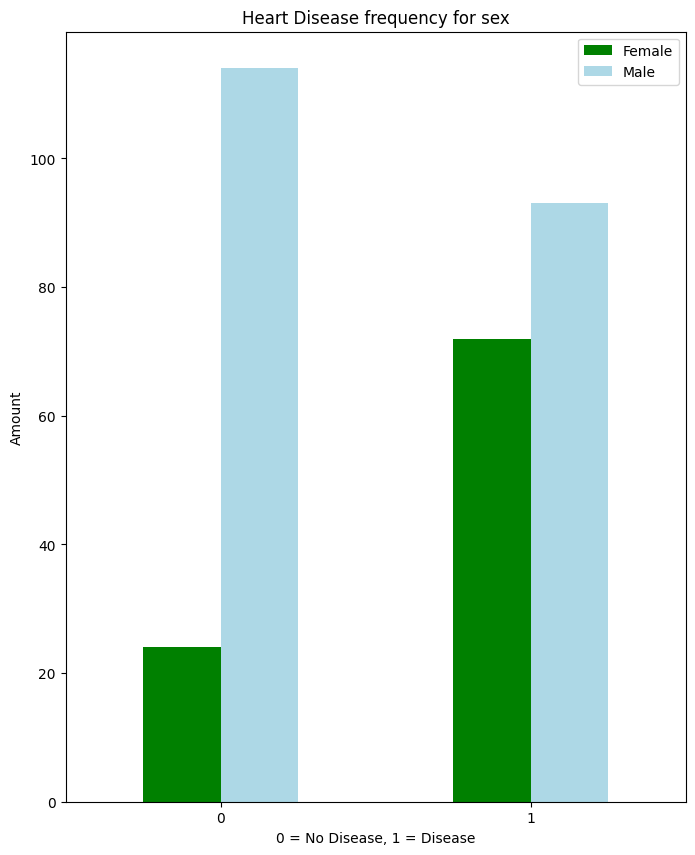

In [15]:
#  Craete a plot of crosstab 
pd.crosstab(data.target, data.sex).plot(kind="bar", 
                                        figsize=(8, 10),
                                       color=["green", "lightblue"]);

# Lets add more features to our plot
plt.title("Heart Disease frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [16]:
# This column is different from the target and age columns because the data are 91 types
# We cant use bar graph tocompare it with the target of just 2 type data (1 and 0)
# We will use the scattered plot in this case

data.thalach.value_counts() 

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

**Age vs. Max Heart Rate for Heart Disease**

In [17]:
# Lets have the ages that correspond to the 1 target
data.age[data.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

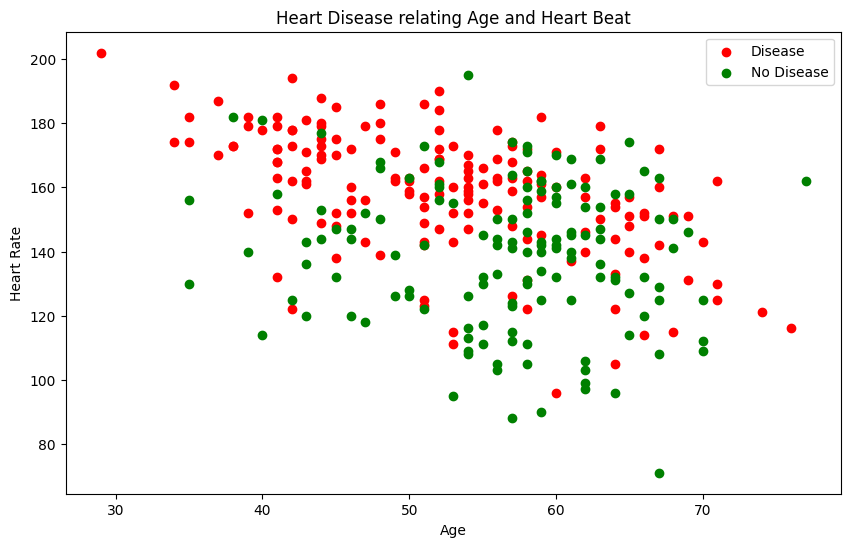

In [18]:
# create another figure 
plt.figure(figsize=(10,6))

# scatter plot with positive examples (target == 1)
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="red")

# Now lets join the negative examples (i.e target == 0)
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c="green")

plt.title("Heart Disease relating Age and Heart Beat")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Heart Rate");

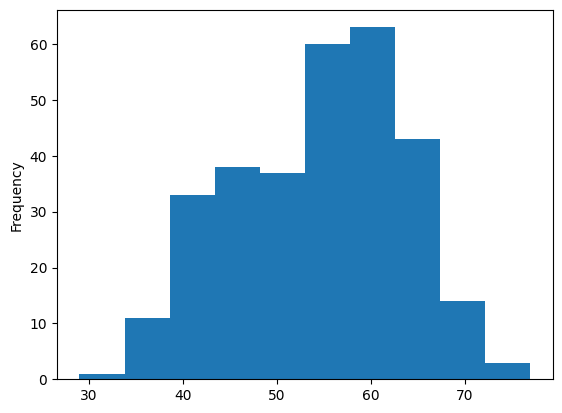

In [19]:
# check the distribution of the age column with the histogram 
data.age.plot.hist(); # this plot will help us deduce the outliers in the data we have

**Heart disease frequency per Chest pain type**

In [20]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


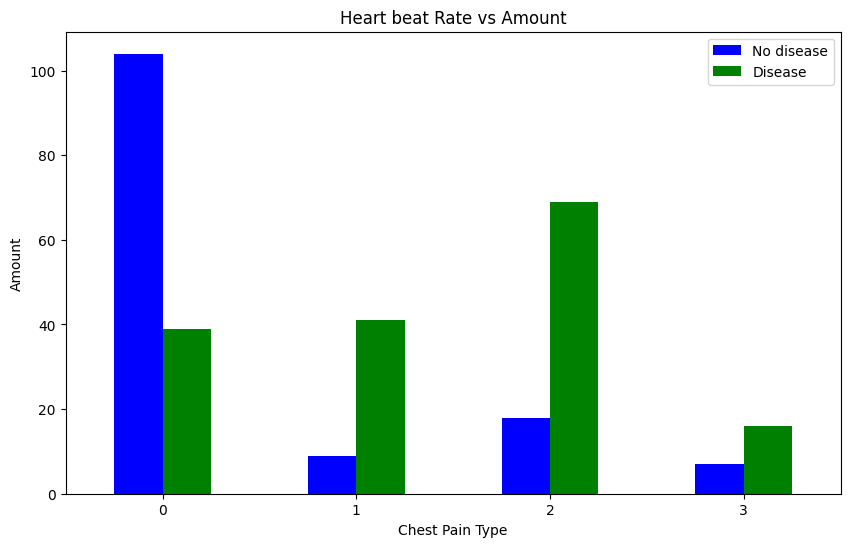

In [21]:
# Lets have a bar plot showing the crossbar relationship

pd.crosstab(data.cp, data.target).plot(kind="bar",
                                      figsize=(10, 6),
                                      color=["blue", "green"])

# Add styling to plot
plt.title("Heart beat Rate vs Amount")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0);

In [22]:
 data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Make a correlation matrix
# This explain how each independent variable are related in a more broder scale
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


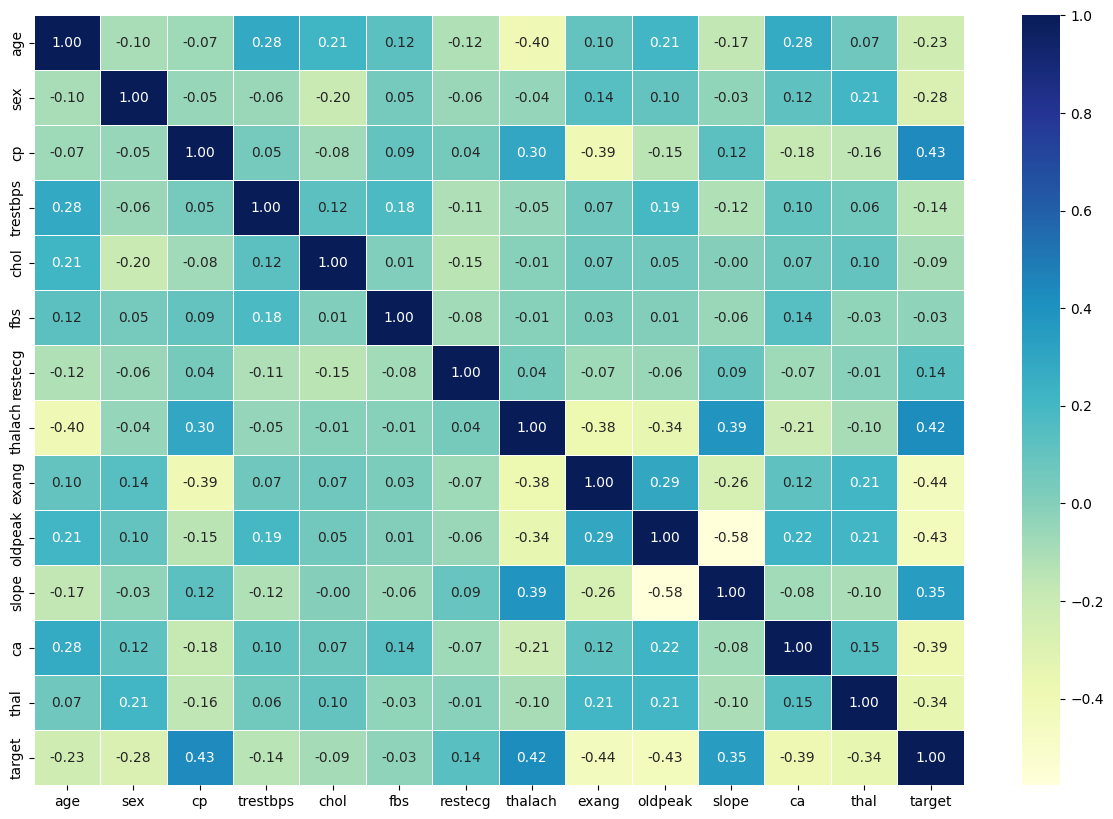

In [24]:
# Lets make the correlation data more beautiful using the seaborn heatmap
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                cmap="YlGnBu")

# A higher positive value means a porential positive correletion. 
# A higher negative value means a potential negative correlation
# Negative correlation is a relationship betwenn two 
# variables in which one varible increases as the other decreases

### d. MODELLING 

In [25]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
# Split the data into x and y 
x = data.drop("target", axis=1)
y = data["target"]

In [27]:
# Now let have test and train data of the plit data
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)


In [28]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [29]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now that our data is in the form of train and test, it's time we build a machine learning model 

We'll train it (find the patterns) on the training set

And we'll test it (use the patterns) on the test set

We are going to try three machine learning models
1. Logistic Regression
2. K-Nearest Neighbours classifier
3. Random Forest Classifier

In [30]:
# Put a model in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models. 
    models: a dictionary of different scikit-learn machine models
    x_train: a trained data (no labels)
    x_test: a test data (no lables)
    y_train: a trained labels data
    y_test: a test labels data 
    """
    # Set randon seed
    np.random.seed(42)
    # Make a dictionary to keep the models scores 
    model_score = {}
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_score[name] = model.score(x_test, y_test)
        
    return model_score

In [31]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

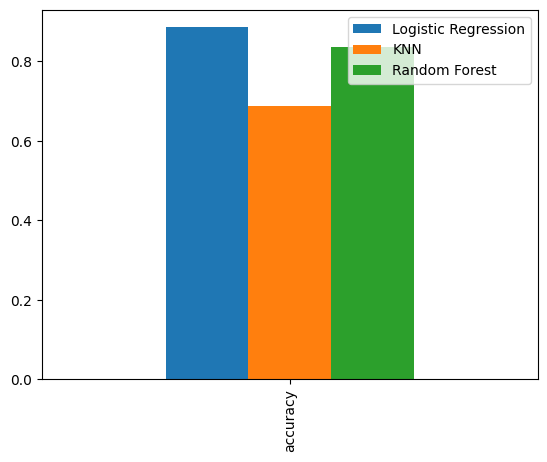

In [32]:
#Let's compare the model results we have 

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.plot.bar();

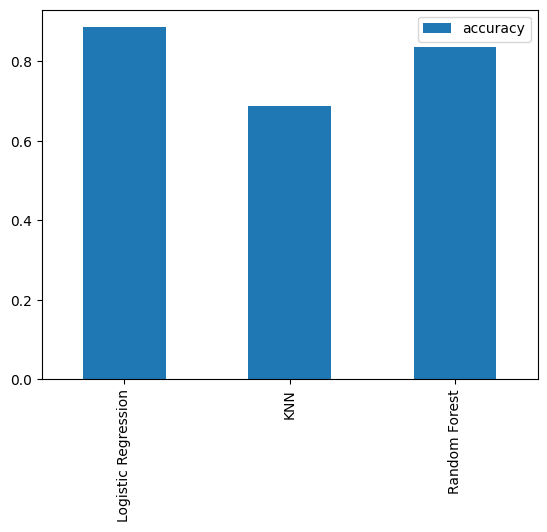

In [33]:
#Let's compare the model results we have using a more better plot involving Transpose (T)

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### e. IMPROVING/TUNING OUR MODEL

Now we have a baseline model and we know a model's first predictions aren't always what we should base our next steps off. What should we do then

Let's look at the following:
* Hyperparameter tunning
* Feature importance 
* Confusion matrix
* Cross-validation 
* Precision
* Recall
* F1 score 
* Classificaction report 
* ROC curve 
* Area under the curve (AUC)

 ##### Hyperparametr tunning

In [34]:
# Let's 
train_scores = []
test_scores = []

# create a list of different values for n_neighbours 
neighbors = range(1, 21)

# Setup KNN instances 
knn = KNeighborsClassifier()

# Loop through different n_neaighbours 
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))
    
    

In [35]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [36]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

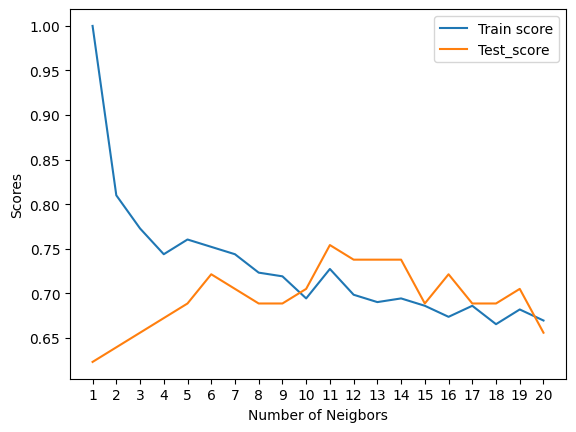

In [37]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test_score")

plt.xlabel("Number of Neigbors")
plt.ylabel("Scores")

plt.xticks(np.arange(1,21,1))
plt.legend();

# Now we can see that the plot gives a more improved test data at n_neighbor = 7 and this 
# improved to 75%. We need to improve this more to have more value (95% or more is the target)

##### Hyperparameter tuning with RandomizedSearchCV

Despite our attempt to improve the value of the KNN model by hyperparameter tunning, the value is still not improved. In cases like this we have to discard the model and try hyperparameter tunning on the other model. 

Now let's use the RandomizedSearchCV to hyperparameter tune the model. Cross Validation metric is very important for classification data model hyperparameter tuning 
We are going to tune:

1. LogisticRegression()
2. RandomForestClassifier()

...........using the **RandomizedSearchCV**

In [38]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

We now have hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV.....

In [39]:
clf_lr = LogisticRegression() # Here are the parameters we can tune to improve our model
clf_lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [40]:
# Tune LogisticRegression 
np.random.seed(42)

# Setup random Hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit the random hyperparameter search model for the LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [41]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [42]:
 rs_log_reg.score(x_test, y_test)

0.8852459016393442

Now we have tuned LogisticRegression, let do that for RandomForestClassifier


In [43]:
clf = RandomForestClassifier() # Here are the hyperparameters we can tune to improve our model 
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [44]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for the RandomForestClassifier 
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [45]:
# Getting the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [46]:
# Evaluate the randomized search RandomForestClassifier model
# Lets score the tuned model 
rs_rf.score(x_test, y_test)

0.8688524590163934

So far, we have being able to use the folowing to work with our data. Hyperparameter tuning by:
    
1. Hand (removed K-Neighbor)
2. RandomizedSearchCV (removed RandForestClassifier)

Now its time we work with GridSearchCV (on the best perfomred model)

**GridSearchCV**

Since our LogisticRegression model provides the best scores so far, we will try and improve it again using GridSearchCV...........

In [47]:
# Let's use the below approach to add the following hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

In [48]:
# Now let's fit the newly tuned model to the trained data
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [49]:
# Fishing out the best of the algorithms 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
# Now we need to score the tuned model 
gs_log_reg.score(x_test, y_test)

0.8852459016393442

### f. EVALUATING OUR MODEL

The above score is accuracy score and its still very much below the required standard of 95%. We still need to tune the data for better modelling value.
**We need to evaluate our tuned machine learning classifier, beyond accuracy.**

We will be using the following to do this:
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Accuracy
* Precision
* Recall 
* F1-score

.....and it would be great if cross-validation was used where possible

To make comparison and evaluate out trained model, first we need to make predictions.

In [51]:
# Make predictions with tuned model 
y_preds = gs_log_reg.predict(x_test)

In [52]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

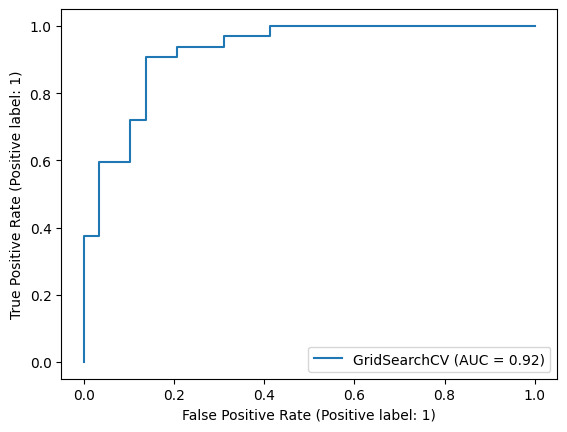

In [53]:
# Plot ROC curve and calculate AUC 
plot_roc_curve(gs_log_reg, x_test, y_test);

In [54]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [55]:
# visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"], 
            colnames=["Predicted labels"])

Predicted labels,0,1
Actual Labels,,
0,25,4
1,3,29


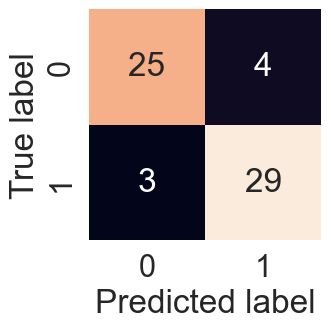

In [70]:
sns.set(font_scale=2.0)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confusion matrix using seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score

In [57]:
classification_data = classification_report(y_test, y_preds)
print(classification_data)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**Calculating evaluation matrics using cross-validation**

We are going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we will be using cross_val_score() function

In [58]:
# Check the best hyperparameters
gs_log_reg.best_params_ # These hyperparameters will now be used to 
                        # further solve precision, recall, and f1_score

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [59]:
# Create a new classifier wuth the best parameters
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

In [60]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [61]:
cv_acc = np.mean(cv_acc)
cv_acc
print(f"The cross validation accuracy is: {cv_acc * 100:.2f}%")

The cross validation accuracy is: 84.80%


In [62]:
# Cross-validated precision
cv_precision = cross_val_score(clf, 
                               x,
                               y,
                               cv=5,
                               scoring="precision")

cv_precision

# Get the mean value of the cross validated precision
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [63]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                            x,
                            y,
                            cv=5,
                            scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [64]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

### g. FEATURE IMPORTANCE

Feature importance is another way of asking "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is based on the model we found best useful for the task at hand. In this case, the LogisticRegression stands out.

>For more information, search for "how to find feature importance using logistic regression"

Let's find the features importance for our logisticRegression model.......


In [65]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [66]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

# Now we fit this model on the train data 
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [67]:
# Check coef_. This coef_ data need to related to the original data
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [68]:
# Match coef's of features to columns
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

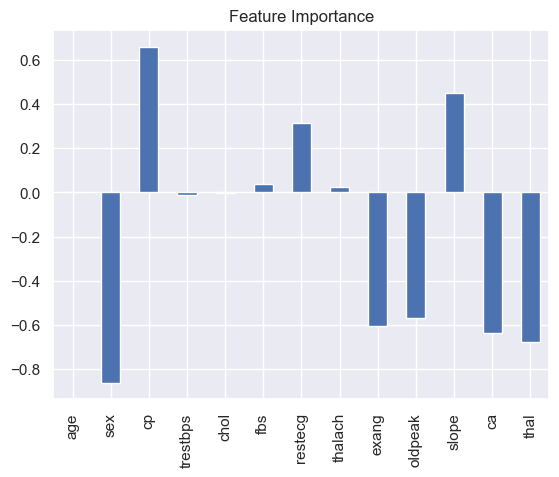

In [69]:
# Let's vitualize feature importance 
feature_data = pd.DataFrame(feature_dict, index=[0])
feature_data.T.plot.bar(title="Feature Importance", legend=False);

## 6. Experimentation

If you haven't hit your evaluation metric target of 95% yet... ask yourself.....

* Could you collect more data?
* Could you try a better model? Make research on CatBoost or XGBoost?
* Could the current model be improve beyond what we gave done so far?
* if your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?